Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [3]:
# pip install yfinance

import yfinance as yf

Tesla = yf.Ticker("TSLA")

tesla_data = Tesla.history(period="max")

tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


 Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [ ]:
pip install pandas requests beautifulsoup4 lxml

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL for Tesla revenue data (using macrotrends.net which provides historical financial data)
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send GET request
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
response = requests.get(url, headers=headers)

# Parse HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the revenue table
tables = soup.find_all('table')

# Extract data from the table
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Find the table with historical data
for table in tables:
    # Check if this is the revenue table by looking for specific headers
    if table.find('thead'):
        rows = table.find('tbody').find_all('tr')
        
        data = []
        for row in rows:
            cols = row.find_all('td')
            if len(cols) >= 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                # Remove $ and convert to proper format
                revenue = revenue.replace('$', '').replace(',', '')
                data.append({'Date': date, 'Revenue': revenue})
        
        if data:  # If we found data, create the dataframe
            tesla_revenue = pd.DataFrame(data)
            break

# Alternative: If the above doesn't work, use a simpler HTML parsing approach
if tesla_revenue.empty:
    # Try to find div with class 'historical_data_table'
    table_div = soup.find('div', {'class': 'historical_data_table'})
    if table_div:
        table = table_div.find('table')
        if table:
            df = pd.read_html(str(table))[0]
            tesla_revenue = df.iloc[:, :2]
            tesla_revenue.columns = ['Date', 'Revenue']
            # Clean revenue column
            tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str).str.replace('$', '').str.replace(',', '')

# Clean the data - remove any empty rows
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue = tesla_revenue.dropna()

# Display the dataframe info
print("Tesla Revenue Data")
print("=" * 50)
print(f"Total rows: {len(tesla_revenue)}")
print(f"\nColumns: {tesla_revenue.columns.tolist()}")
print("\n" + "=" * 50)
print("Last 5 rows of tesla_revenue dataframe:")
print("=" * 50)

# Display the last five rows using tail function
print(tesla_revenue.tail())


Tesla Revenue Data
Total rows: 15

Columns: ['Date', 'Revenue']

Last 5 rows of tesla_revenue dataframe:
    Date Revenue
10  2014    3198
11  2013    2013
12  2012     413
13  2011     204
14  2010     117


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [8]:
# pip install yfinance

import yfinance as yf

GME = yf.Ticker("GME")

gme_data = GME.history(period="max")

gme_data.reset_index(inplace=True)

gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL for GME revenue data (using macrotrends.net which provides historical financial data)
url = "https://www.macrotrends.net/stocks/charts/GME/gme/revenue"

# Send GET request
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
response = requests.get(url, headers=headers)

# Parse HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the revenue table
tables = soup.find_all('table')

# Extract data from the table
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Find the table with historical data
for table in tables:
    # Check if this is the revenue table by looking for specific headers
    if table.find('thead'):
        rows = table.find('tbody').find_all('tr')
        
        data = []
        for row in rows:
            cols = row.find_all('td')
            if len(cols) >= 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                # Remove $ and convert to proper format
                revenue = revenue.replace('$', '').replace(',', '')
                data.append({'Date': date, 'Revenue': revenue})
        
        if data:  # If we found data, create the dataframe
            gme_revenue = pd.DataFrame(data)
            break

# Alternative: If the above doesn't work, use a simpler HTML parsing approach
if gme_revenue.empty:
    # Try to find div with class 'historical_data_table'
    table_div = soup.find('div', {'class': 'historical_data_table'})
    if table_div:
        table = table_div.find('table')
        if table:
            df = pd.read_html(str(table))[0]
            gme_revenue = df.iloc[:, :2]
            gme_revenue.columns = ['Date', 'Revenue']
            # Clean revenue column
            gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(str).str.replace('$', '').str.replace(',', '')

# Clean the data - remove any empty rows
gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']
gme_revenue = gme_revenue.dropna()

# Display the dataframe info
print("GME Revenue Data")
print("=" * 50)
print(f"Total rows: {len(gme_revenue)}")
print(f"\nColumns: {gme_revenue.columns.tolist()}")
print("\n" + "=" * 50)
print("Last 5 rows of tesla_revenue dataframe:")
print("=" * 50)

# Display the last five rows using tail function
print(gme_revenue.tail())


GME Revenue Data
Total rows: 15

Columns: ['Date', 'Revenue']

Last 5 rows of tesla_revenue dataframe:
    Date Revenue
10  2015    9296
11  2014    9040
12  2013    8887
13  2012    9551
14  2011    9474


Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

C:\Users\Dell-1\AppData\Local\Temp\ipykernel_10020\1071380525.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", period="5y", interval="1d")  # adjust period/interval as you like
[*********************100%***********************]  1 of 1 completed


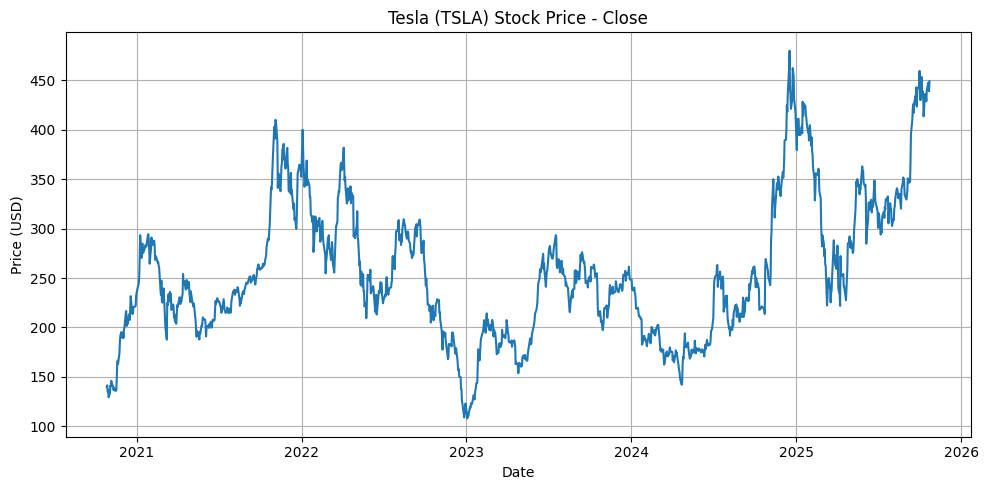

In [10]:
# If needed (run once): pip install yfinance pandas matplotlib

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data: pd.DataFrame, title: str) -> None:
    """
    Plot the Close price over time from a stock DataFrame.
    Accepts data with either a DatetimeIndex or a 'Date' column.
    """
    # Ensure we have a Date column to plot on the x-axis
    if 'Date' in stock_data.columns:
        x = pd.to_datetime(stock_data['Date'])
    else:
        # If Date is the index (e.g., from yf.download), use it directly
        x = pd.to_datetime(stock_data.index)

    # Choose the Close column if present; fallback to 'Adj Close' if needed
    y = stock_data['Close'] if 'Close' in stock_data.columns else stock_data['Adj Close']

    plt.figure(figsize=(10, 5))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---- Fetch Tesla stock data and plot ----
tsla = yf.download("TSLA", period="5y", interval="1d")  # adjust period/interval as you like
tsla.reset_index(inplace=True)  # optional; make_graph works with or without this

make_graph(tsla, "Tesla (TSLA) Stock Price - Close")


Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

C:\Users\Dell-1\AppData\Local\Temp\ipykernel_10020\1380844444.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", period="5y", interval="1d")  # adjust period/interval as needed
[*********************100%***********************]  1 of 1 completed


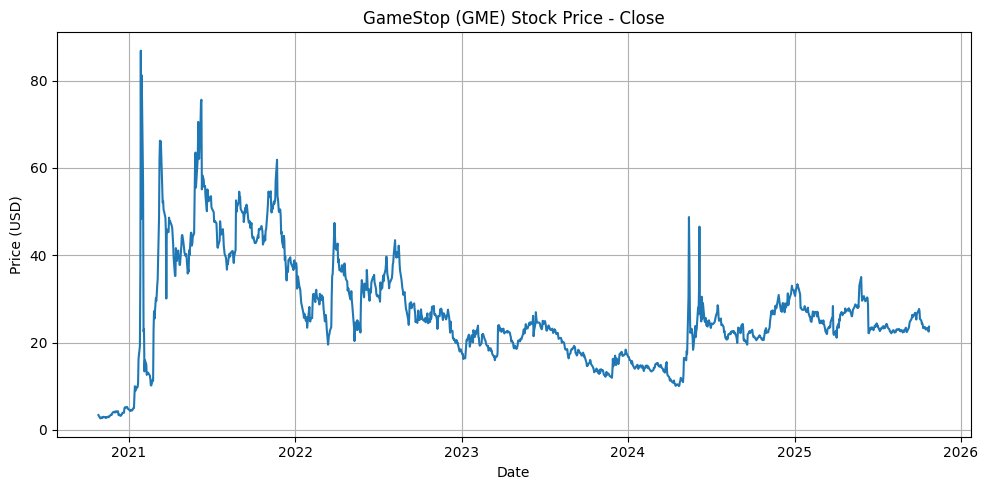

In [11]:
# If needed (run once): pip install yfinance pandas matplotlib

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data: pd.DataFrame, title: str) -> None:
    """
    Plot the Close price over time from a stock DataFrame.
    Works whether the date is a column ('Date') or the index.
    """
    if 'Date' in stock_data.columns:
        x = pd.to_datetime(stock_data['Date'])
    else:
        x = pd.to_datetime(stock_data.index)

    y = stock_data['Close'] if 'Close' in stock_data.columns else stock_data['Adj Close']

    plt.figure(figsize=(10, 5))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Fetch GameStop stock data and plot ---
gme_data = yf.download("GME", period="5y", interval="1d")  # adjust period/interval as needed
gme_data.reset_index(inplace=True)  # optional; make_graph works with or without this

make_graph(gme_data, "GameStop (GME) Stock Price - Close")
